# Import Libraries and Data Files

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from datetime import date, datetime,timedelta
from matplotlib.lines import Line2D

%matplotlib inline 

In [2]:
# Import data files
df_weather = pd.read_csv('./assets/data_clean/weather_clean.csv')
df_traps = pd.read_csv('./assets/data_clean/traps_clean.csv')
df_test = pd.read_csv('./assets/data_clean/test_clean.csv')
df_train = pd.read_csv('./assets/train.csv')
df_spray = pd.read_csv('./assets/data_clean/spray_clean.csv')

In [3]:
# set date columns
df_train['Date'] =  pd.to_datetime(df_train['Date'])
df_spray['date'] =  pd.to_datetime(df_spray['date'])
df_traps['date'] =  pd.to_datetime(df_traps['date'])

In [4]:
# remove duplicates
df_train.drop_duplicates(inplace=True)

In [5]:
# convert date to date datatype and set it as index

df_weather['date'] =  pd.to_datetime(df_weather['date'])
df_weather.set_index('date',inplace=True)

# Exploratory Data Analysis

## A. Explore weather datasets

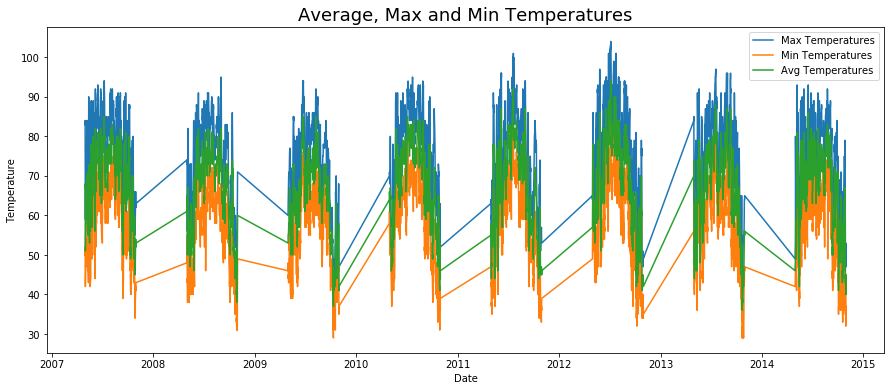

In [6]:
# Plots of Average, Max and Min temperatures over the years
# We can see seasonality - low temperatures from the end to beginning of each year

plt.figure(figsize=(15,6))

plt.plot(df_weather['tmax'], label="Max Temperatures")
plt.plot(df_weather['tmin'], label="Min Temperatures")
plt.plot(df_weather['tavg'], label="Avg Temperatures")

plt.ylabel('Temperature')
plt.xlabel('Date')

plt.title(label = 'Average, Max and Min Temperatures', fontsize=18)
plt.legend()
plt.show();

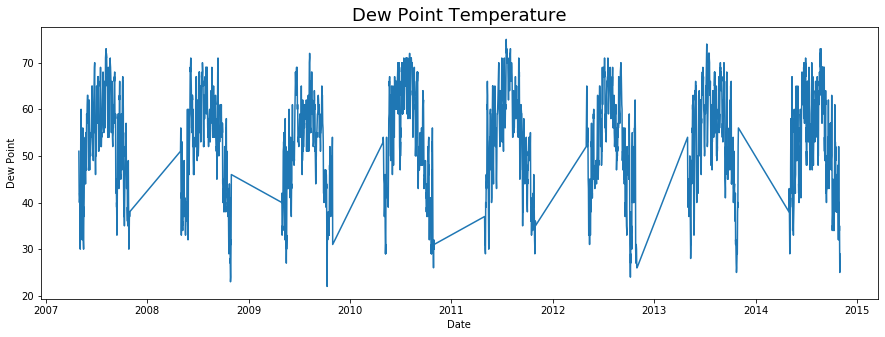

In [7]:
# Plot of Dew Point temperature over the years
# We can see seasonality - low temperatures from the end to beginning of each year

plt.figure(figsize=(15,5))
plt.plot(df_weather['dewpoint'])
plt.ylabel('Dew Point')
plt.xlabel('Date')
plt.title(label = 'Dew Point Temperature', fontsize=18)
plt.show();

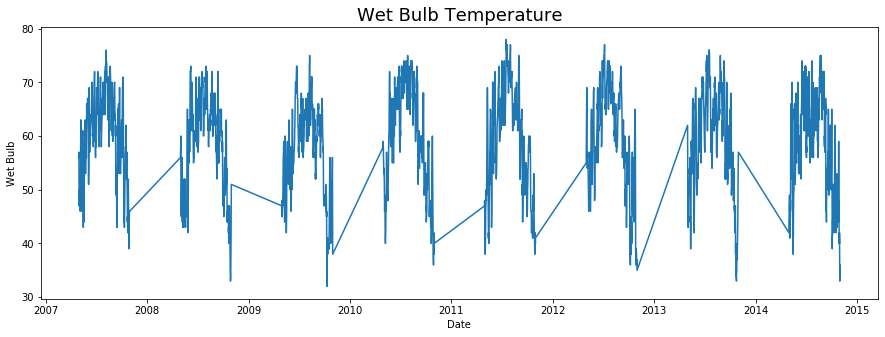

In [8]:
# Plot of water bulb temperature over the years
plt.figure(figsize=(15,5))
plt.plot(df_weather['wetbulb'])
plt.ylabel('Wet Bulb')
plt.xlabel('Date')
plt.title(label = 'Wet Bulb Temperature', fontsize=18)
plt.show();

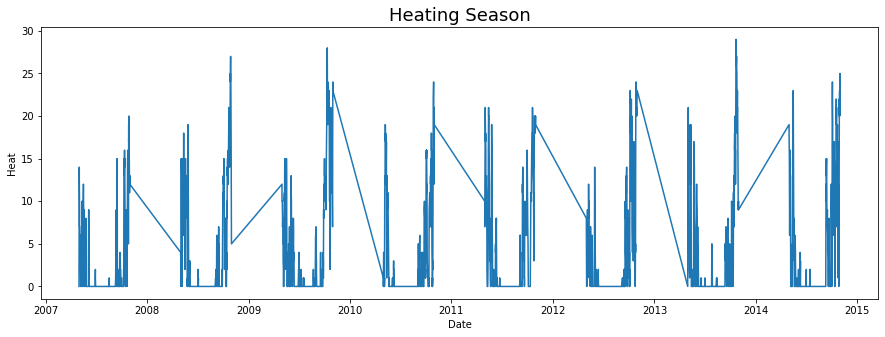

In [9]:
# Plot of heating season
plt.figure(figsize=(15,5))
plt.plot(df_weather['heat'])
plt.ylabel('Heat')
plt.xlabel('Date')
plt.title(label = 'Heating Season', fontsize=18)
plt.show();

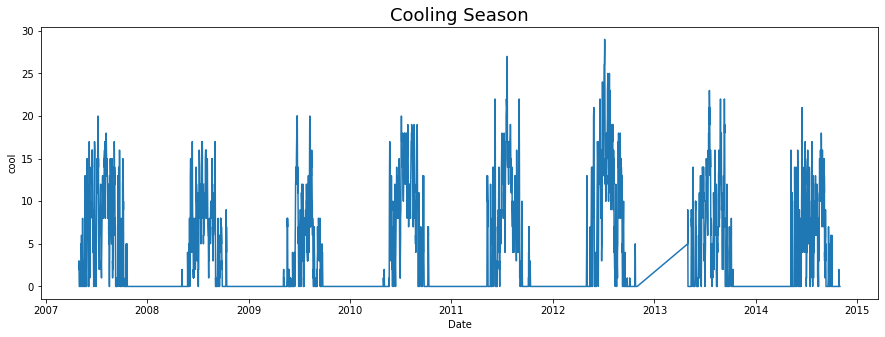

In [10]:
# Plot of cooling season
plt.figure(figsize=(15,5))
plt.plot(df_weather['cool'])
plt.ylabel('cool')
plt.xlabel('Date')
plt.title(label = 'Cooling Season', fontsize=18)
plt.show();

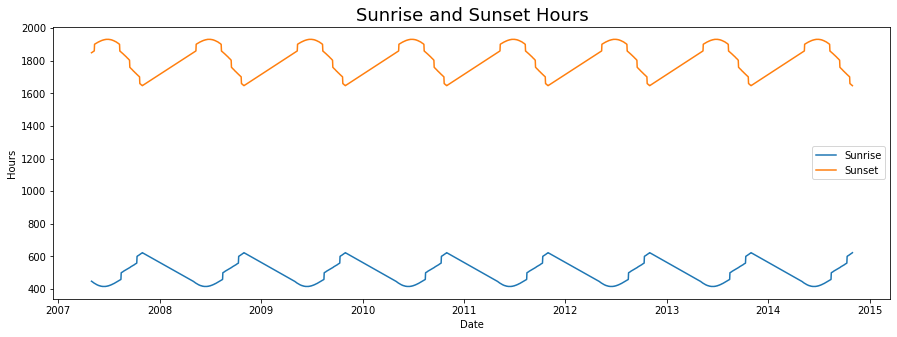

In [11]:
# Plot of Sunrise and sunset timings over the years
# We can see seasonality - longer daylight hours during summers and shorter during winter
plt.figure(figsize=(15,5))

plt.plot(df_weather['sunrise'],label="Sunrise")
plt.plot(df_weather['sunset'],label="Sunset")


plt.ylabel('Hours')
plt.xlabel('Date')
plt.title(label = 'Sunrise and Sunset Hours', fontsize=18)
plt.legend()
plt.show();

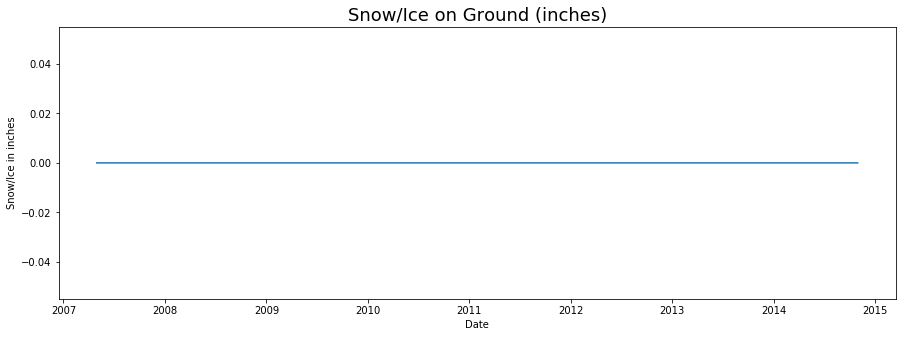

In [12]:
# Snowfall on Ground
plt.figure(figsize=(15,5))

plt.plot(df_weather['depth'])

plt.ylabel('Snow/Ice in inches')
plt.xlabel('Date')
plt.title(label = 'Snow/Ice on Ground (inches)', fontsize=18)
plt.show();

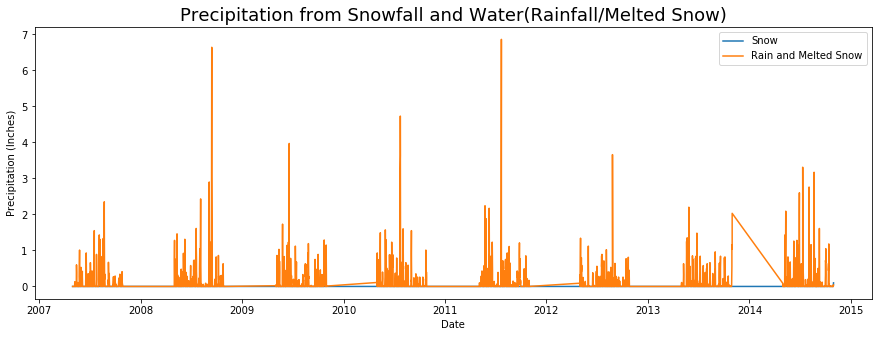

In [13]:
# Precipitation from snowfall and water
plt.figure(figsize=(15,5))
plt.plot(df_weather['snowfall'],label="Snow")
plt.plot(df_weather['preciptotal'],label="Rain and Melted Snow")
plt.ylabel('Precipitation (Inches)')
plt.xlabel('Date')
plt.title(label = 'Precipitation from Snowfall and Water(Rainfall/Melted Snow)', fontsize=18)
plt.legend()
plt.show();

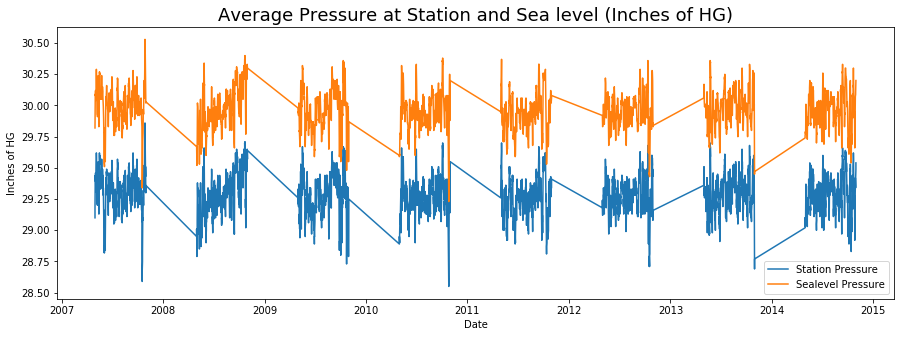

In [14]:
# Compare the pressure at Station and Sea Level
plt.figure(figsize=(15,5))

plt.plot(df_weather['stnpressure'],label="Station Pressure")
plt.plot(df_weather['sealevel'],label="Sealevel Pressure")

plt.ylabel('Inches of HG')
plt.xlabel('Date')
plt.title(label = 'Average Pressure at Station and Sea level (Inches of HG)', fontsize=18)
plt.legend()
plt.show();

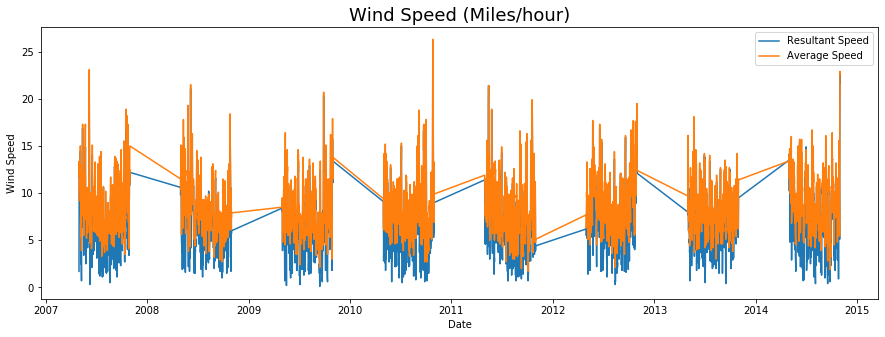

In [15]:
# Plot of Wind speed
plt.figure(figsize=(15,5))

plt.plot(df_weather['resultspeed'],label="Resultant Speed")
plt.plot(df_weather['avgspeed'],label="Average Speed")

plt.ylabel('Wind Speed')
plt.xlabel('Date')
plt.title(label = 'Wind Speed (Miles/hour)', fontsize=18)
plt.legend()
plt.show();

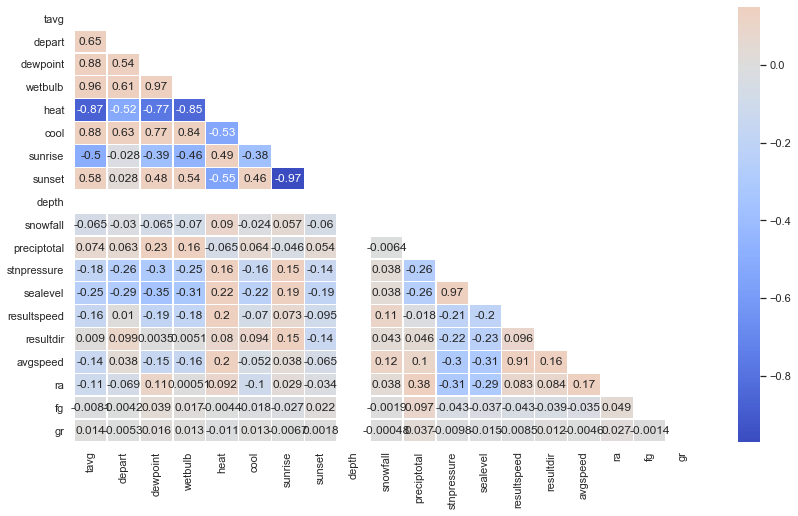

In [16]:
# Show the correlation between the weather features

sns.set(style="white")
        
corr = df_weather.iloc[:,3:22].corr()
fig,ax = plt.subplots(figsize=(14,8))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr,mask=mask,cmap='coolwarm',annot=True,cbar=True,linewidths=0.5,square=False,vmax=.15, center=0)

## B. Explore Trap (Training) dataset

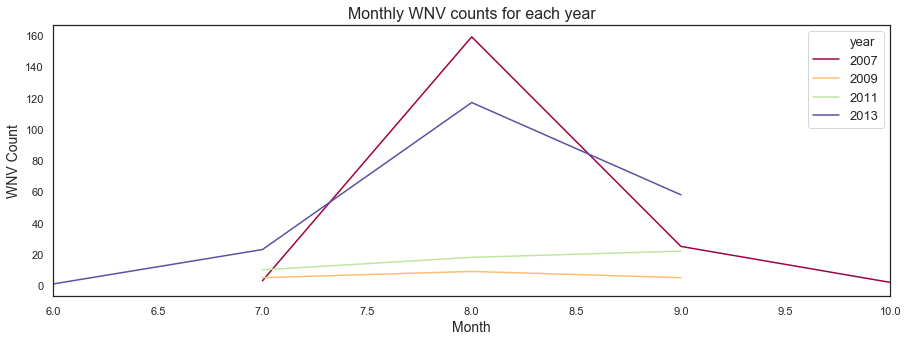

In [17]:
# plot WNV counts by month and year

plt.figure(figsize=(15,5))
#wnv = df_traps[['date','wnv_pres']].copy(deep=True)

traps = df_traps[['date', 'wnv_pres']].copy(deep=True)
wnv = traps[traps['wnv_pres'] == True].copy(deep=True)
wnv['year'] = wnv.date.dt.year
wnv['month'] = wnv.date.dt.month
wnv = wnv.groupby(['year','month'])['wnv_pres'].sum().reset_index()

p = sns.lineplot(x = wnv.month,y = 'wnv_pres', data = wnv, hue = 'year', ci = None, 
             legend = 'full', palette = 'Spectral')
p.legend(fontsize = 13)
p.set_title('Monthly WNV counts for each year', fontsize=16)
p.set_xlabel('Month',fontsize=14)
p.set_ylabel('WNV Count',fontsize=14)
p.set_xlim(wnv.month.min(), wnv.month.max());

#### Mosquitoes breed during the warmer months of summer in July, Aug and Sep, peaking in Aug.

### Next we will show the Total Number of Mosquitoes found and breakdown by Species

In [18]:
wnv = df_train.groupby(['Species'])['NumMosquitos'].count().reset_index()
wnv

,Species,NumMosquitos
0,CULEX ERRATICUS,1
1,CULEX PIPIENS,2239
2,CULEX PIPIENS/RESTUANS,4469
3,CULEX RESTUANS,2672
4,CULEX SALINARIUS,85
5,CULEX TARSALIS,6
6,CULEX TERRITANS,221


In [19]:
traps = df_train[['WnvPresent','Species']].copy(deep=True)
wnv = traps.groupby(['Species'])['WnvPresent'].sum().reset_index()
wnv

,Species,WnvPresent
0,CULEX ERRATICUS,0
1,CULEX PIPIENS,208
2,CULEX PIPIENS/RESTUANS,246
3,CULEX RESTUANS,49
4,CULEX SALINARIUS,0
5,CULEX TARSALIS,0
6,CULEX TERRITANS,0


### Plots of Mosquito count by Species and WNV count by Species

Text(0.5, 0, 'Mosquito Count')

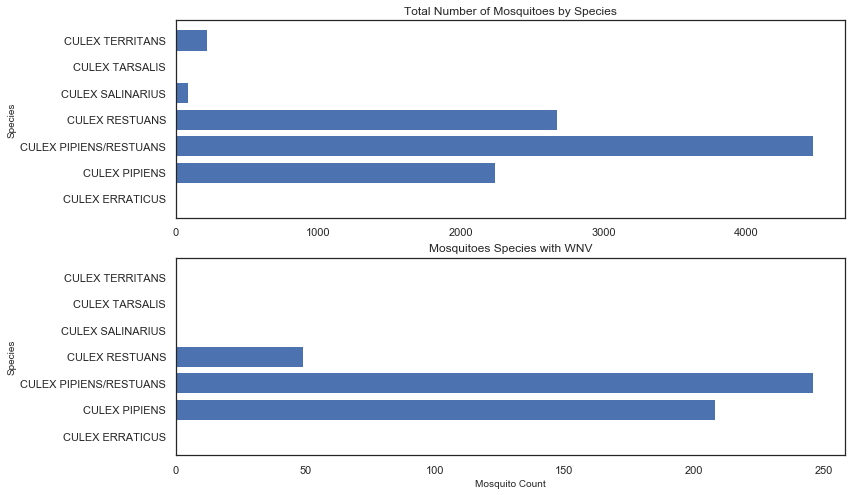

In [20]:
# Show Total Mosquito by Species and WNV mosquito by Species

mos = df_train.groupby(['Species'])['NumMosquitos'].count().reset_index()

traps = df_train[['WnvPresent','Species']].copy(deep=True)
wnv = traps.groupby(['Species'])['WnvPresent'].sum().reset_index()


# Plot of Mosquito by species
fig, axs = plt.subplots(2,figsize=(12,8))

axs[1].barh(wnv['Species'],wnv['WnvPresent'])
axs[0].barh(mos['Species'],mos['NumMosquitos'])
axs[1].title.set_text('Mosquitoes Species with WNV')
axs[0].title.set_text('Total Number of Mosquitoes by Species')
axs[1].set_ylabel('Species',fontsize=10)
axs[0].set_ylabel('Species',fontsize=10)
axs[1].set_xlabel('Mosquito Count',fontsize=10)

#### Interpretation: The above shows that Culex Pipiens/Restuans is the most common mosquito species found in Chicago. It is also the species with the most WNV

### Plot of WNV distribution with Breakdown by Species

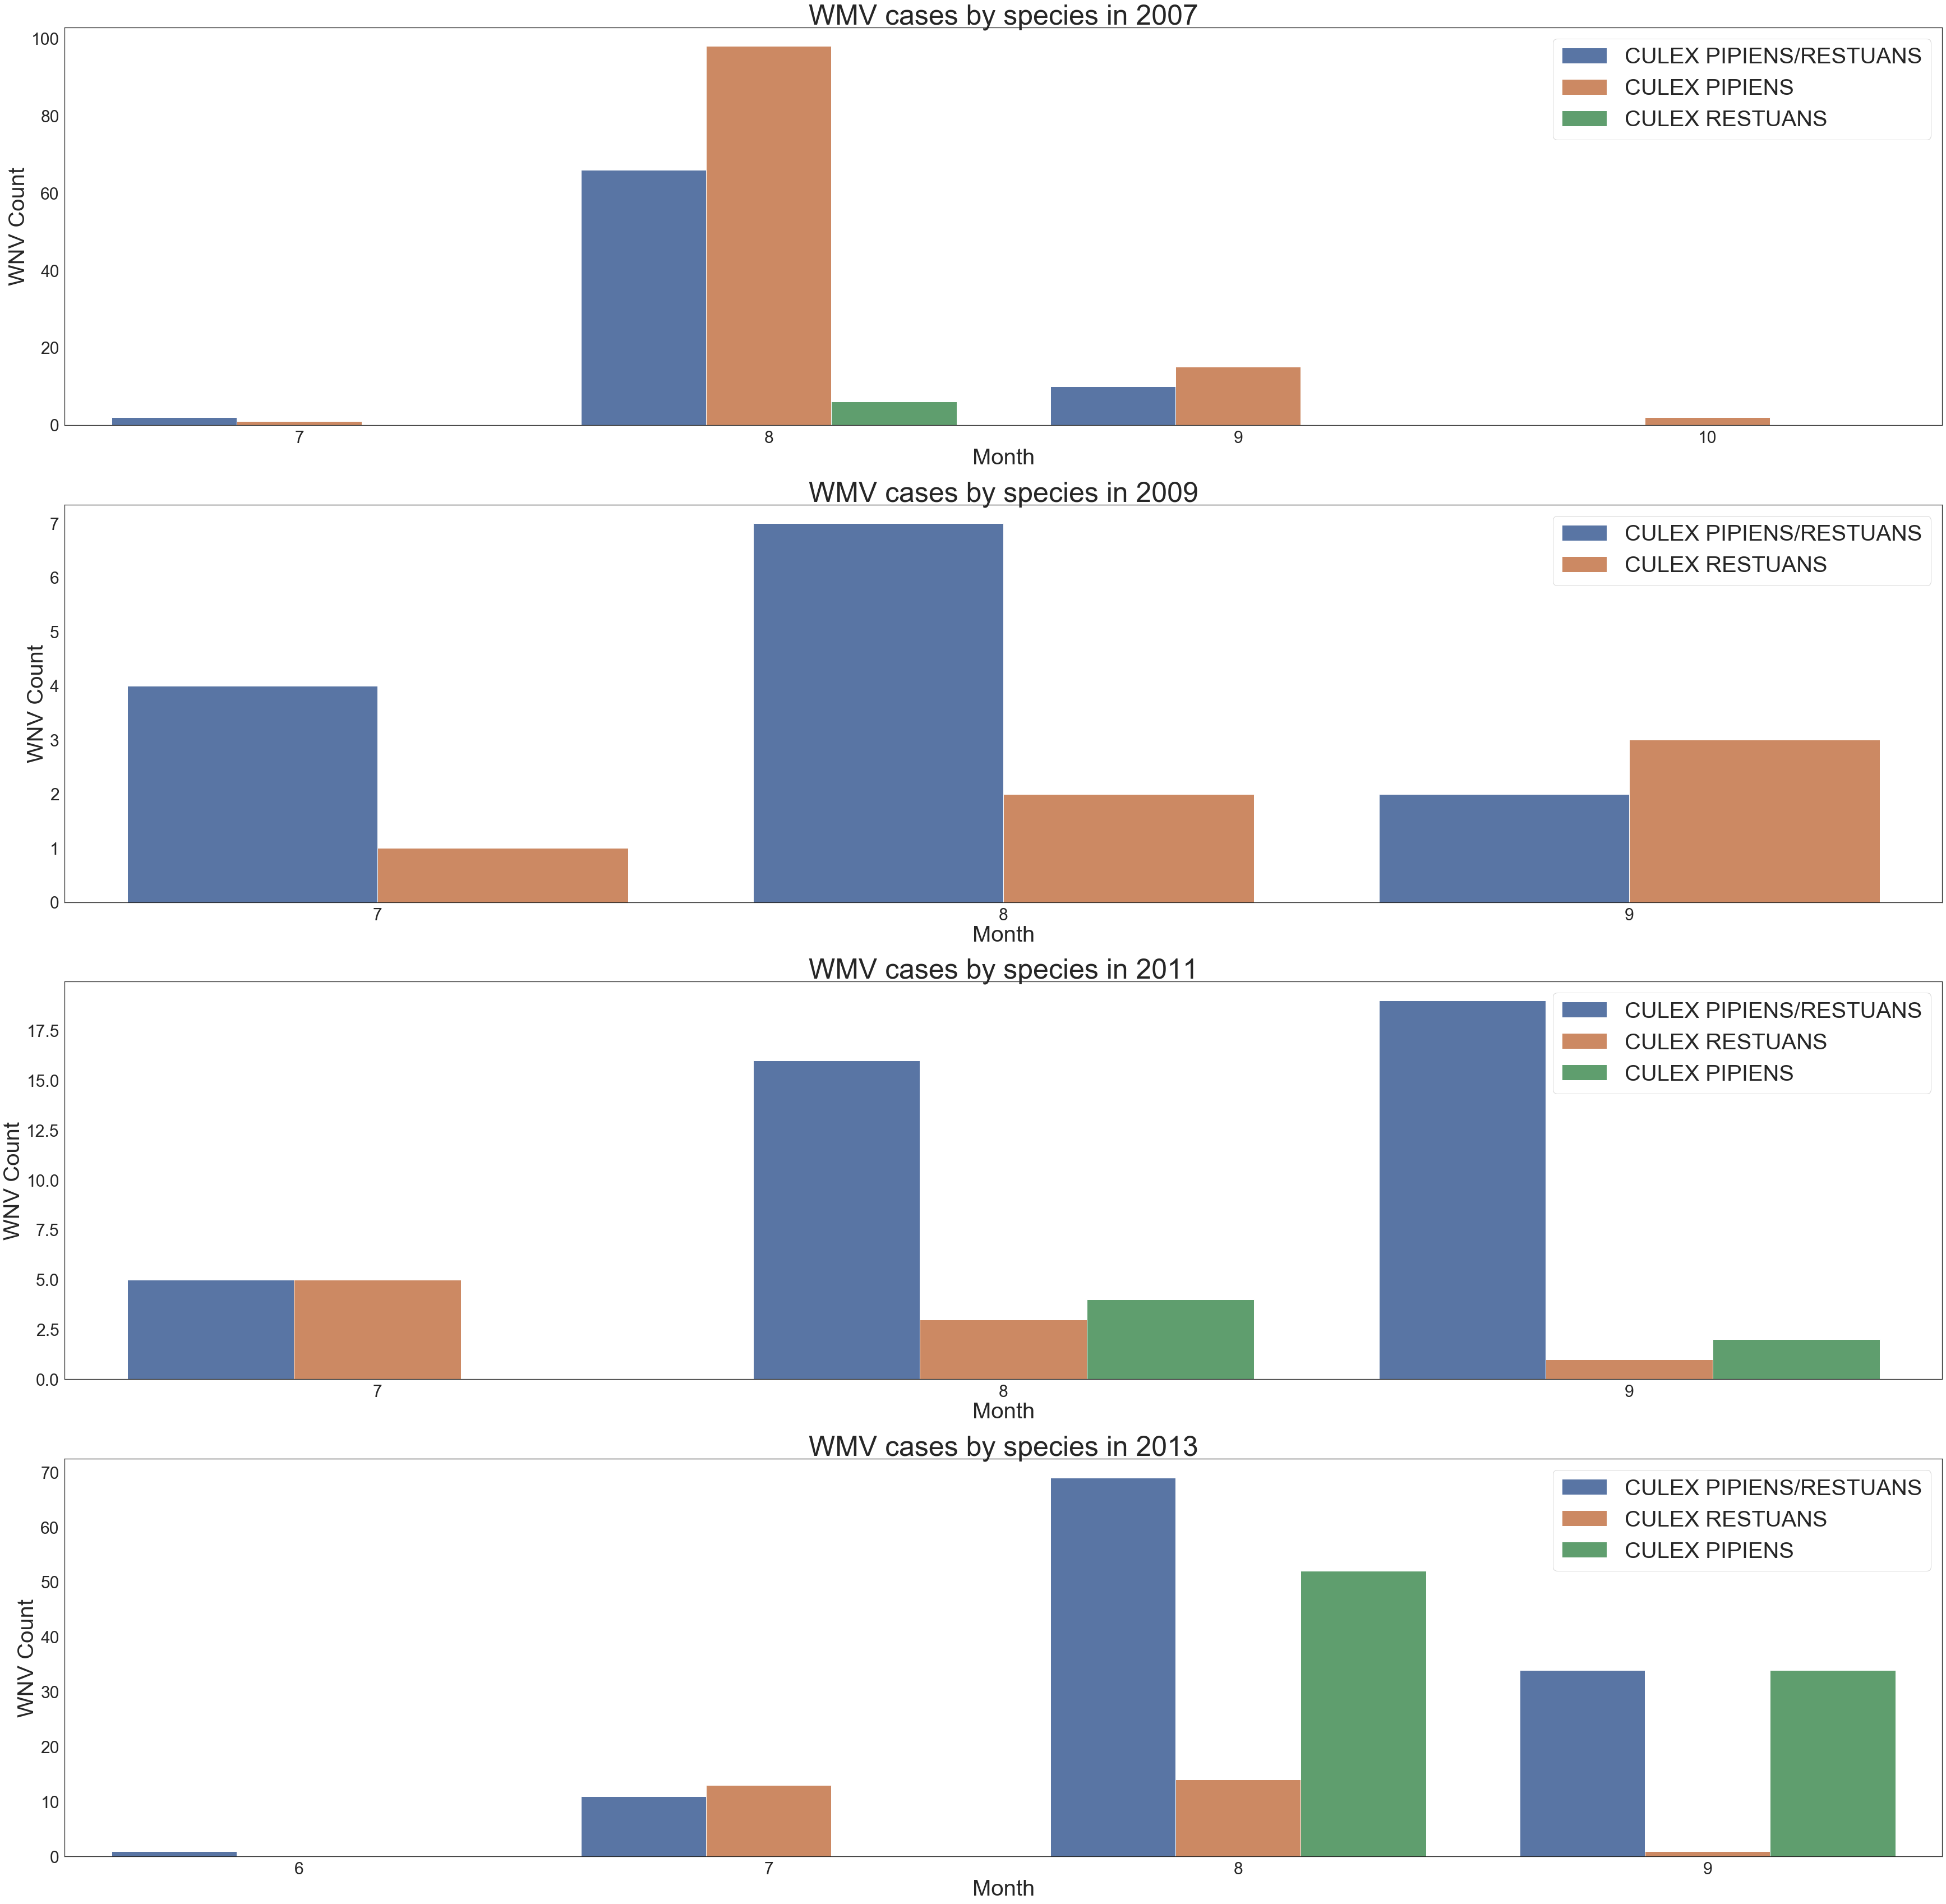

In [21]:
# Show the distribution of WMV over time with breakdown by Species

years = df_train.Date.dt.year

gs = gridspec.GridSpec(4, 1)
fig = plt.figure(figsize=(60,60))

for idx, y in enumerate(df_train.Date.dt.year.unique()):
    traps = df_train[years == y][['Date', 'Trap', 'Species', 'WnvPresent']]
    infections = traps[traps['WnvPresent'] == True]
    ax = fig.add_subplot(gs[idx])
    p = sns.countplot(x=infections.Date.dt.month, hue='Species', data=infections, ax=ax)
    p.set_title('WMV cases by species in {}'.format(y),fontsize=50)
    p.set_xlabel("Month",fontsize=40)
    p.set_ylabel('WNV Count',fontsize=40)
    p.legend(fontsize=40,loc='upper right')
    p.tick_params(labelsize=30)

#### Interpretation: Culex Pipiens/Restuans is the most common species with WNV

## C. Explore Spray, Traps and Weather datasets together

### Plots of maps to show spray areas, traps and WNV found

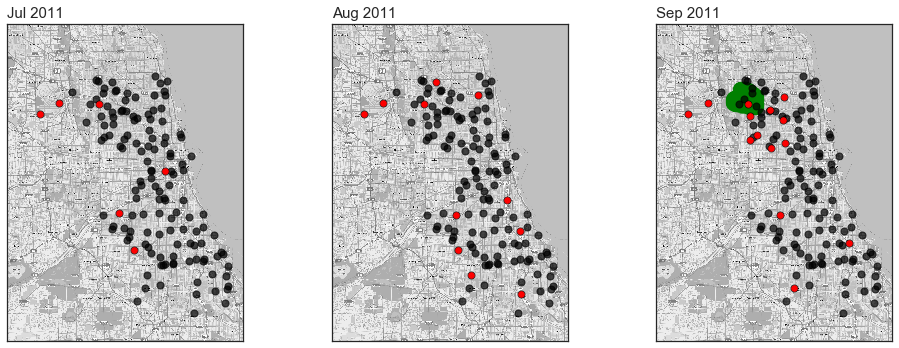

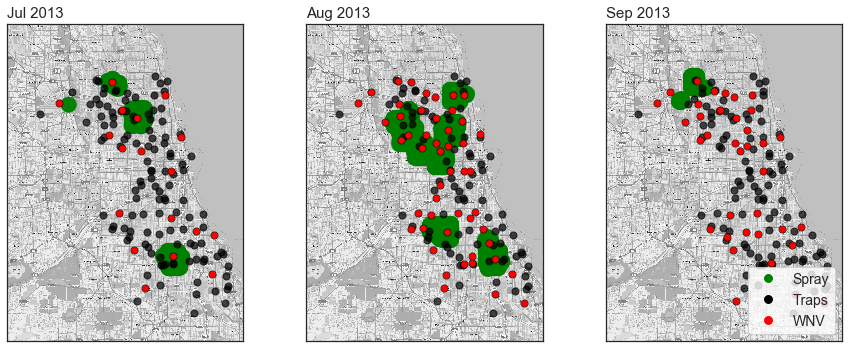

In [22]:
# plot of spray and WMV infection over the years

# set up basemap
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# create plot for each month and year of spray
for year in df_spray.date.dt.year.unique():
    fig, ax = plt.subplots(ncols = 3, figsize = (16,5))
    
    for i, month in enumerate([7,8,9]):
        # plot basemap
        ax[i].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
        
        
        if year in df_spray.date.dt.year.unique() and month in df_spray.date.dt.month.unique():
            
            # plot spray locations for year and month
            sprayed = df_spray[(df_spray.date.dt.year == year) & 
                               (df_spray.date.dt.month == month) &
                               (df_spray.longitude>-88) &
                               (df_spray.longitude<-87.5) &
                               (df_spray.latitude>41.6) &
                               (df_spray.latitude<42.1)][['longitude', 'latitude']].drop_duplicates().values
            
            ax[i].scatter(sprayed[:,0], sprayed[:,1],  marker='o', c = 'green', s = 200, alpha = 0.5)
            
            
            # consolidate date/time and locations of WMV mosquito
            wnv = df_traps[(df_traps.date.dt.year == year) & (df_traps.date.dt.month == month) & (df_traps.wnv_pres == 1)]\
                [['lon', 'lat']].drop_duplicates().values
        

            # plot trap locations
            locations = df_traps[['lon', 'lat']].drop_duplicates().values
            ax[i].scatter(locations[:,0], locations[:,1], marker='o', c = 'black', s=50, alpha = 0.7)

            # plot locations of WMV mosquito found
            ax[i].scatter(wnv[:,0], wnv[:,1], marker='o', c = 'red', s = 30)        

            

            
            
            # title and axes
            do = datetime.strptime(str(month), "%m")
            month_name = do.strftime("%b")

            ax[i].set_title(f"{month_name} {year}", fontsize = 15, ha = 'left', position = (0,1))
            ax[i].set_xticks([])
            ax[i].set_yticks([])

            plt.tight_layout()

# legend
legend_elements=[Line2D([0],[0],marker='o', color='white',label='Spray', markerfacecolor='green', markersize=10),
                 Line2D([0],[0],marker='o', color='white', label='Traps',markerfacecolor='black', markersize=10),
                 Line2D([0],[0],marker='o', color='white',label='WNV',markerfacecolor='red', markersize=10)]

plt.legend(handles=legend_elements, loc='lower right', fontsize=14)
plt.tight_layout()

In [23]:
# Spray was only done in 2011 and 2013 in the month of July, Aug and Sep
print(df_spray.date.dt.year.unique())
print(df_spray.date.dt.month.unique())

[2011 2013]
[8 9 7]


In [24]:
# traps were setup in 2007, 2009, 2011 and 2013 from May to Oct
print(df_traps.date.dt.year.unique())
print(df_traps.date.dt.month.unique())

[2007 2009 2011 2013]
[ 5  6  7  8  9 10]


#### Map for Aug 2011 interpretation

Sprays were in the wrong locations. None was below latitude 42.1 but WNV mosquitoes were found elsewhere

In [25]:
# No spray below latitude 42.1 in aug 2011
df_spray[(df_spray.date.dt.year==2011) & (df_spray.date.dt.month==8) & (df_spray['latitude']<42.1)]

,date,time,latitude,longitude


In [26]:
# Sprays were carried in aug 2011 above latitude 42.1
df_spray[(df_spray.date.dt.year==2011) & (df_spray.date.dt.month==8)].head()

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [27]:
# we can see many wnv cases below 42.1 in aug 2011
df_traps[(df_traps.wnv_pres==1) & (df_traps.date.dt.year==2011) & (df_traps.date.dt.month==8) & (df_traps.lat<42.1)].head()

,date,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,...,sq,vcfg,gr,ts,ra,fg,sn,mifg,num_mos,wnv_pres
5640,2011-08-05,41.957799,-87.930995,903,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,10.0,1.0
5641,2011-08-05,41.957799,-87.930995,903,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,39.0,1.0
5650,2011-08-05,41.974689,-87.890615,900,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,59.0,1.0
5658,2011-08-05,42.008314,-87.777921,8,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,23.0,1.0
5661,2011-08-12,41.673408,-87.599862,115,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,55.0,1.0


#### Map for Jul 2011 interpretation
We can see sprays were only above latitude 41.9. This covers only part of the WNV area, so not very effective

In [28]:
# No spray was done in july 2011
df_spray[(df_spray.date.dt.year==2011) & (df_spray.date.dt.month==7)]

,date,time,latitude,longitude


#### Map for  Sep 2013 interpretation
We can see sprays were only above latitude 41.9. This covers only part of the WNV area, so not very effective

In [29]:
# Plenty of sprays above latitude 41.9
df_spray[(df_spray.date.dt.year==2013) & (df_spray.date.dt.month==9) & (df_spray['latitude']>41.9)]

,date,time,latitude,longitude
13911,2013-09-05,7:27:13 PM,41.997975,-87.790912
13912,2013-09-05,7:27:23 PM,41.998570,-87.790907
13913,2013-09-05,7:28:03 PM,41.999500,-87.790910
13914,2013-09-05,7:28:13 PM,41.999970,-87.790897
13915,2013-09-05,7:28:33 PM,42.000087,-87.790688
...,...,...,...,...
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423


In [30]:
# No sprays below latitude 41.9 and so missed most of the WNV mosquitoes
df_spray[(df_spray.date.dt.year==2013) & (df_spray.date.dt.month==9) & (df_spray['latitude']<41.9)]

,date,time,latitude,longitude


### Plot of Mosquito Count vs Temperature

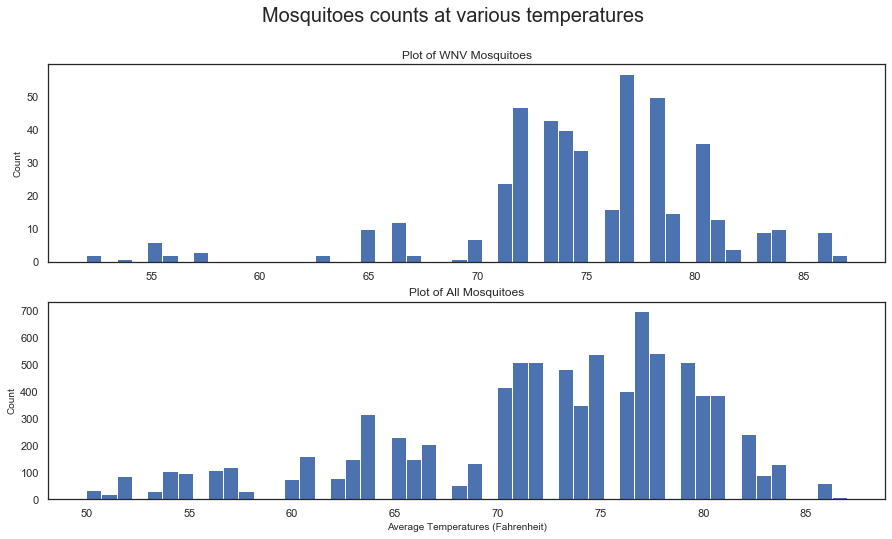

In [31]:
traps = df_traps[['tavg', 'wnv_pres']].copy(deep=True)
wnv = traps[traps['wnv_pres'] == True]['tavg'].tolist()
mos = traps['tavg'].tolist()


fig, axs = plt.subplots(2,figsize=(15,8))
fig.suptitle('Mosquitoes counts at various temperatures', fontsize=20)
axs[0].hist(wnv,bins=50)
axs[1].hist(mos,bins=50)
axs[0].title.set_text('Plot of WNV Mosquitoes')
axs[1].title.set_text('Plot of All Mosquitoes')
axs[0].set_ylabel('Count',fontsize=10)
axs[1].set_ylabel('Count',fontsize=10)
axs[1].set_xlabel('Average Temperatures (Fahrenheit)',fontsize=10)

plt.show()

#### Interpretation: Most mosquitoes are found when the temperature is between 70 and 80 degree Fahrenheit, regardless of whether the species carry WNV

### Plot of Mosquito Count vs Precipitation 

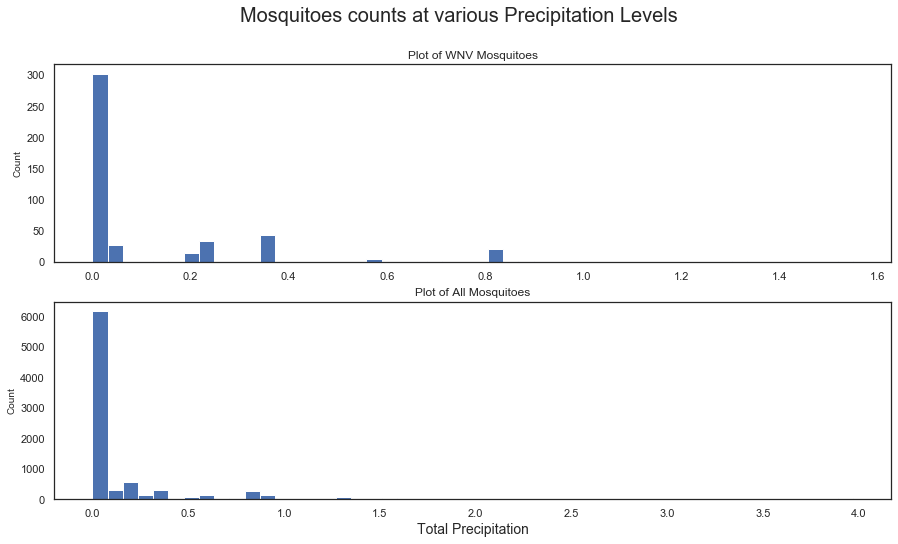

In [32]:
traps = df_traps[['preciptotal', 'wnv_pres']].copy(deep=True)
wnv = traps[traps['wnv_pres'] == True]['preciptotal'].tolist()
mos = traps['preciptotal'].tolist()


fig, axs = plt.subplots(2,figsize=(15,8))
fig.suptitle('Mosquitoes counts at various Precipitation Levels', fontsize=20)
axs[0].hist(wnv,bins=50)
axs[1].hist(mos,bins=50)
axs[0].title.set_text('Plot of WNV Mosquitoes')
axs[1].title.set_text('Plot of All Mosquitoes')
axs[0].set_ylabel('Count',fontsize=10)
axs[1].set_ylabel('Count',fontsize=10)
axs[1].set_xlabel('Total Precipitation',fontsize=14)

plt.show()

#### Interpretation: Mosquitoes thrive in low precipitation (dry season)